# How to Price and Hedge American Options Using Regression-based Methods

## Hedged Least Square Method

Author: Jerry Xia

Date: 2018/08/27

## 1. Introduction

This is a Python Notebook about an inovative method of the Monte Carlo simulation, Hedged Least Square Method (HLSM) in order to price and hedge American type options. In this script, I implemented the following variance reduction methods as well as their antithetic variates' version:

* regular Monte Carlo for European options
* least square Monte Carlo for American options
* Monte Carlo with delta-based control variates for European options
* optimal hedged Monte Carlo for European options
* hedged least square Monte Carlo for American options

Due to the significant efficience and robustness, I mainly focus on the optimal hedged least square Monte Carlo (OHLSMC) in option pricing. We invoke this method to price American options and make comparison with the original least square monte carlo (LSM).

### 1.1 Facts
* The option price is not simply the average value of the discounted future pay-off over the objective (or historical) probability distribution
* The requirement of absence of arbitrage opportunities is equivalent to the existence of "risk-neutral measure", such that the price is indeed its average discounted future pay-off.
* Risk in option trading cannot be eliminated

### 1.2 Objective
* It would be satisfactory to have an option theory where the objective stochastic process of the underlying is used to calculate the option price, the hedge strategy and the *residual risk*.

### 1.3 Advantages
* It is a versatile methods to price complicated path-dependent options.
* Considerable variance reduction scheme for Monte Carlo
* It provide not only a numerical estimate of the option price, but also of the optimal hedge strategy and of the residual risk.
* This method does not rely on the notion of risk-neutral measure, and can be used to any model of the true dynamics of the underlying

## 2 Underlying dynamics

### Black-Scholes Model
$$dS = \mu S dt + \sigma S dW_t$$
$$log S_{t+1} = log S_t +(\mu - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} \epsilon$$
where
$$\epsilon \sim N(0,1)$$
In risk neutral measure, $\mu = r - q$. 
### Heston Model
The basic Heston model assumes that $S_t$, the price of the asset, is determined by a stochastic process:
$$
dS_t = \mu S_t dt + \sqrt{v_t} S_t d W_t^S\\
dv_t = \kappa (\theta - v_t) dt + \xi \sqrt{v_t} d W_t^v
$$
where 
$$E[dW_t^S,dW_t^v]=\rho dt$$
In risk neutral measure, $\mu = r - q$. 

## 3 Methodology

### 3.1 Notations
Option price always requires to work backward. That is because the option price is known exactly at the maturity. As with other schemes, we determine the option price step by step from the maturity $t=K\tau=T$ to the present time $t=0$. The unit of time being $\tau$, for example, one day. We simulate $N$ trajectories. In trajectory i, the price of the underlying asset at time $k\tau$ is denoted as $S_k^{(i)}$. The price of the derivative at time $k\tau$ is denoted as $C_k$, and the hedge function is $H_k$. We define an optimal hedged portfolio as
$$W_k^{(i)} = C_k(S_k^{(i)}) + H_k(S_k^{(i)})S_k^{(i)}$$
The one-step change of our portfolio is
$$\Delta W_k^{(i)}= df(k,k+1) C_{k+1}(S_{k+1}^{(i)}) - C_k(S_k^{(i)}) + H_k(S_{k}^{(i)}) (df2(k,k+1) S_{k+1}^{(i)} - S_{k}^{(i)})$$
Where $df(k,k+1)$ is the discounted factor from time $k\tau$ to $(k+1) \tau$, $df2(k,k+1)$ is the discounted factor considering dividend $e^{-(r-q)(t_{k+1}-t_k)}$

### 3.2 Objective
The optimal hedged algorithm can be interpreted as the following optimal problem

\begin{align}
\mbox{minimize}\quad & \quad Var[\Delta W_k]\\
\mbox{subject to}\quad & \quad E[\Delta W_k]=0
\end{align}

It means we should try to minimize the realized volatility of hedged portfolio while maintaining the expected value of portfolio unchanged.

### 3.3 Basis Functions
The original optimization is very difficult to solve. Thus we assume a set of basis function and solved it in such subspace. We use $N_C$and $N_H$ to denote the number of basis functions for price and hedge.

\begin{align}
C_k(\cdot) &= \sum_{i=0}^{N_C} a_{k,i} A_i(\cdot)\\
H_k(\cdot) &= \sum_{i=0}^{N_H} b_{k,i} B_i(\cdot)
\end{align}

The basis functions $A_i$ and $B_i$ are priori determined and need not to be identical. The coefficients $a_i$ and $b_i$ can be calibrated by solving the optimal problem.

### 3.4 Numerical Solution

\begin{align}
\mbox{minimize}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)2}\\
\mbox{subject to}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)}=0
\end{align}

Denote the discounted forward underlying price change at time $k\tau$ as

$$\Delta S_k = df2(k,k+1) S_{k+1} - S_k$$

Define

\begin{align}
Q_k &= \begin{bmatrix}
    -A_{k,1}(S_k^{(1)}) & \cdots & -A_{k,N_C}(S_k^{(1)}) & B_{k,1}(S_k^{(1)})\Delta S_k^{(1)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(1)} \\
    -A_{k,1}(S_k^{(2)}) & \cdots & -A_{k,N_C}(S_k^{(2)}) & B_{k,1}(S_k^{(2)})\Delta S_k^{(2)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(2)} \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    -A_{k,1}(S_k^{(N)}) & \cdots & -A_{k,N_C}(S_k^{(N)}) & B_{k,1}(S_k^{(N)})\Delta S_k^{(N)}& \cdots  & B_{k,N_H}(S_k^{(N)})\Delta S_k^{(N)}
    \end{bmatrix}\\\\
c_k &= (a_{k,1}, \cdots a_{k,N_C}, b_{k,1}, \cdots, b_{k,N_H})^T\\\\
v_{k} &= df(k,k+1) C_{k+1}(S_{k+1}^{})
\end{align}

As for $v_k$, note that we know the exact value at maturity, which means there is no need to approximate price in terms of basis functions, that is

\begin{align}
v_k = \begin{cases}
df(N-1,N)\ payoff(S_N),\quad & k=N-1\\
df(k,k+1)\ \sum_{i=1}^{N_C} a_{k+1,i} A_i(S_{k+1}), \quad & 0<k<N-1\\
df(0,1)\ C_1(S_1), \quad & k=0
\end{cases}
\end{align}

Then, the optimization problem can be expressed as

\begin{align}
\arg\min_{c_k}\quad & \quad (v_{k} + Q_k c_k)^T (v_{k} + Q_k c_k)\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T (v_{k}  + Q_k c_k)=0
\end{align}

In step k, since we already know the information ($v_{k}$) in step k+1. By canceling the constant term, the optimal problem can be simplified as the following 

\begin{align}
\arg\min_{c_k}\quad & \quad 2 v_{k}^T Q_k c_k + c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

### 3.5 Convex Optimization Problem

Let us first review the standard form of linear constrained quadratic programming problem:

\begin{align}
    \min_{x} \quad & \frac{1}{2} x^T P x + q^T x\\
    \mbox{subject to} \quad &G x \preceq h\\
    &A x = b
\end{align}

Note that $x^T$ means the transpose of vector x, and $G x \preceq h$denotes the inequality is taken element-wise over the vectors $G x$ and $h$. The objective function is convex if and only if the matrix $P$ is positive-semidefinite(Hermitian matrix all of whose eigenvalues are nonnegative), which is the realm we concern with.

Recall that the constrained optimization problem:

\begin{align}
\arg\min_{c_k}\quad & \quad  v_{k}^T Q_k c_k + \frac{1}{2}c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

Correspondingly, we make the connection by letting

\begin{align}
    x &= c_k\\
    P &= Q_k^T Q_k\\
    q &= Q_k^T v_k\\
    A &= 1_{[N\times1]}^T Q_k\\
    b &= -1_{[N\times1]}^T v_{k}
\end{align}

The hard work is almost over right now. As you would always find, formulating the problem is usually the hard step. Invoking a solver is straightforward.

Note that when $k=0$, the degree of freedom of the quadratic problem decreases to 2. Because here the only concerns are price and hedge at time zero (we don't need to project them into a high dimension space). Let $x=[C_0, H_0]^T$

\begin{align}
    Q_0 &= \begin{bmatrix}
    -1 & \Delta S_0^{(1)}\\
    \vdots & \vdots\\
    -1 & \Delta S_0^{(N)}
    \end{bmatrix}\\
    P &= Q_0^T Q_0\\
    q &= Q_0^T v_0\\
    A &= 1_{[N \times 1]}^T Q_0\\
    b &= -1_{[N \times 1]}^T v_0
\end{align}

## 4 Variance reduction and other methods
The rate of convergence of the Monte Carlo simulation is $O\left(\max \left( \Delta t, \frac{1}{N_x} \right)\right)$. The variance reduction techniques are used to reduce the constant factor corresponding to the Monte Carlo approximation $O \left(\frac{1}{N_x}\right)$. Some of the most used variance reduction techniques are:

* Control Variates
* Antithetic Variates
* Moment Matching

In this part we selected antithetic variates and delta-based control variates methods as a supplement to optimal hedged monte carlo simulation.

### 4.1 Antithetic variates
The main idea of this technique is to look at the asset equation that you aretrying to simulate:
$$d S_t^{(1)} = r S_t^{(1)} dt + \sigma S_t^{(1)} d W_t$$
and recognize that sinceztis a standard Brownian motion so will be−ztandthey will have the same exact distribution.  This means that the equation:
$$d S_t^{(2)} = r S_t^{(2)} dt - \sigma S_t^{(2)} d W_t$$
will also generate paths of the same asset.
The variance depends on the sign of the covariance of $payoff(S_t^{(1)})$ and $payoff(S_t^{(2)})$. It can increase the eventual variance or decrease it, both case do arise. One sufficient condition to insure variance reduction is the monotony of the payoff function. Then, when using both in the calculation of the final Monte Carlo value the variance of the estimate will be reduced.

### 4.2 Delta-based control variates
Delta hedging can be summarized succinctly in the following way:  Suppose that at time $t= 0$, we receive $C_0$ the price of an option that pays $C_T$ at time T.  The price of this option at any time $t$ is a function $C(t,S)$. Then, if we hold at any moment in time $\frac{\partial C}{\partial S}(t,S) = \frac{\partial C_t}{\partial S}$ units of stock, then we will be able to replicate the payout of this option $C_T$ at time T. This is in theory since of course we cannot trade continuously. So in practice we perform a partial hedge where we only rebalance at some discrete moments in time say $t_1,t_2,\cdots,t_N$. The replicating strategy can be expressed as follow:
$$W(t_i,S_i) = C(t_0,S_0) e^{r(t_i - t_0)} + \sum_{j=0}^{i} \Delta(t_j,S_j) ( S_{j+1} e^{-r(t_{j+1} - t_j )} - S_{j})e^{r(t_i - t_j)} = C(t_i,S_i)$$
which is similar to the strategy in the optimal hedged Monte Carlo simulation where the only difference is that in OHMC, we use option and delta hedging to replicate the cash flow and here we do the opposite operation. But when implementing the delta-based control variates, we should move the hedging term to the right hand side which make it identical to the OHMC strategy. Note that here we are assumed to know the delta hedging function. It explains a lot why OHMC can reduce the variance.

### 4.3 Optimal hedged Monte Carlo simulation
**In conclusion, OHMC is just a control variates method with an optimization on top and it is more practical because we do not have an analytical formula for the hedge sensitivity (i.e. delta, gamma, etc.)**

## 5 Add Hedging portfolio with the Least Square Monte Carlo (LSM)

In order to price Amrican type options, we need to consider the problem of optimal exercise. LSM is a well-defined method to tackle this problem. In contrast, here we only utilize the information of exercise points along each simulation path using cross-sectional regression. Different from the original LSM, here we equipe basis functions to approximate price and hedge at each step similar to OHMC. And discuss independently at the inception.

This combination create a magic reaction. Now we can not only price the American options but also hedge it! Moreover, it's model independent, model parameters or construction, dimension doesn't matter at all! We use Black-Scholes and Heston model as examples. What only matters is the underlying price trials. With it, we can calculate the following stuffs.

* American options price
* American options Greeks
* American options optimal exercise boundary

Here, Bouchard and Warin concluded two main dynamic strategy in American options pricing, A1 and A2. Besides, I equiped them with a hedging strategy:

### 5.1 A1 strategy with optimal exercise time estimate

* Initialization: $\tau(t_J) = T$
* Backward induction: 
* $\tau(t_j) = t_j \mathbf{1}_{\{g(t_j)\geq C(t_j)\}} + \tau(t_{j+1})\mathbf{1}_{\{Z(t_j)<C(t_j)\}}$
* Price estimator at 0:$P_0 = E[g(\tau(t_0),X_{\tau(t_0)})]$


### 5.3 A2 strategy with American values estimate

* Initialization: $P_T = g(T,X_T)$
* Backward induction: $P_{t_j} = max\{g(t_j,X_{t_j}),E[P_{t_{j+1}}]\}$
* Price estimator at 0: $P_0$

### 5.2 A2b strategy with optimal exercise time estimate and American values estimate

* Initialization: $\tau(t_J) = T$
* Backward induction: 
    * $\tau(t_j) = t_j \mathbf{1}_{\{g(t_j)\geq C(t_j)\}} + \tau(t_{j+1})\mathbf{1}_{\{Z(t_j)<C(t_j)\}}$
    * Price estimator at j:$P_j = E[g(\tau(t_j),X_{\tau(t_j)})]$ for $j=J,J-1,\cdots,1$
* Price estimator at 0 (one-step hedged MC): ${arg\,min}_{P_0,H_0} E[(\Delta W_0)^2]$

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from cvxopt import matrix, solvers
import binomial
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from MonteCarlo import MonteCarlo

In [3]:
risk_free_rate = 0.06
dividend = 0.0
time_to_maturity = 1
volatility = 0.3
strike = 1.1
stock_price = 1
n_trials = 400
n_steps = 20
func_list = [lambda x: x**0, lambda x: x] # basis for OHMC part
option_type = 'p'

In [26]:
binomial.put(S=stock_price, K=strike, sigma=volatility, r=risk_free_rate,
             t=time_to_maturity, div=dividend, n=n_steps, am=True)

0.15262237404048512

In [27]:
binomial.put(S=stock_price, K=strike, sigma=volatility, r=risk_free_rate,
             t=time_to_maturity, div=dividend, n=n_steps, am=False)

0.1409834432994072

In [29]:
mc = MonteCarlo(stock_price,strike,time_to_maturity,risk_free_rate,dividend,volatility)

In [30]:
mc.BlackScholesPricer(option_type=option_type) # BS formula for European options

0.14018199152981647

In [31]:
mc.BSDelta

-0.48711664358348156

In [32]:
price_matrix = mc.simulate(n_trials,n_steps)

In [33]:
# # Sanity check
# price_matrix = [[1,1.09,1.08,1.34],
#                [1,1.16,1.26,1.54],
#                [1,1.22,1.07,1.03],
#                [1,0.93,0.97,0.92],
#                [1,1.11,1.56,1.52],
#                [1,0.76,0.77,0.90],
#                [1,0.92,0.84,1.01],
#                [1,0.88,1.22,1.34]]
# price_matrix = np.array(price_matrix)
# mc.price_matrix = price_matrix

In [34]:
# mc.LSM3(option_type=option_type,func_list=[lambda x: x**0, lambda x: x],onlyITM=False,buy_cost=0.0,sell_cost=0.0)

In [35]:
mc.LSM(option_type=option_type,func_list=[lambda x: x**0, lambda x: x],onlyITM=False,buy_cost=0.0,sell_cost=0.0)

price: 0.15106104051425842, delta-hedge: 0.44849620415068886


In [15]:
# mc.LSM2(option_type=option_type,func_list=[lambda x: x**0, lambda x: x],buy_cost=0.0,sell_cost=0.0)

In [13]:
# mc.LSM(option_type=option_type,func_list=[lambda x: x**0, lambda x: x],onlyITM=False,buy_cost=0.05,sell_cost=0.08)

In [14]:
# mc.american_values_matrix,mc.price_matrix,mc.exercise_matrix

In [42]:
mc.MCPricer(option_type=option_type,isAmerican=True) # LSM for American options

0.1499380767008969

In [43]:
mc.MCPricer(option_type=option_type,isAmerican=False) # original MC for European options

0.14536444436004428

In [1]:
# mc.OHMCPricer(option_type=option_type,isAmerican=True) # OHLSM for American options

In [45]:
mc.OHMCPricer(option_type=option_type,isAmerican=False) # OHLSM for European options

0.14256024021081362

### 5.5 Performance Test:

#### Parameters:

    risk_free_rate = 0.06
    dividend = 0.0
    time_to_maturity = 1
    volatility = 0.3
    strike = 1.1
    stock_price = 1
    n_trials = 4000
    n_steps = 20
    func_list = [lambda x: x**0, lambda x: x] # basis for OHMC part
    option_type = 'p'
    
#### Results:

**American Options**

|Algorithm | Price  | Delta  |
|---|---|---|
| A1  | 0.1499 | N/A  | 
|  A2 |  0.1590 | 0.585  | 
|  A2b |  0.1500 | 0.491  | 


**European Options**

* BS Formula: 0.1401
* BS Binomial Tree: 0.1410
* Regular MC: 0.1453
* OHMC: 0.1426

## 6 Early Exercise Comparison

In [67]:
mc = MonteCarlo(S0=stock_price,K=1,T=time_to_maturity,r=risk_free_rate,q=dividend,sigma=volatility)
price_matrix = mc.simulate(n_trials,n_steps)

In [72]:
mc.LSM(option_type='c',func_list=[lambda x: x**0, lambda x: x],onlyITM=False,buy_cost=0.0,sell_cost=0.0)

price: 0.15535896988712722, delta-hedge: -0.7567046868819357


In [73]:
mc.HLSM_price,mc.HLSM_delta

(0.15535896988712722, 0.7567046868819357)

In [7]:
K1 = 0.9
K2 = 1.2

In [49]:
def earlyExerciseComparison(S0,K,T,r,q,sigma,option_type):
    metric_dict = dict()
    mc = MonteCarlo(S0,K,T,r,q,sigma)
    price_matrix = mc.simulate(n_trials,n_steps)
    mc.LSM(option_type=option_type,func_list=[lambda x: x**0, lambda x: x],onlyITM=False,buy_cost=0.0,sell_cost=0.0)
    metric_dict["BS price"] = mc.BlackScholesPricer(option_type)
    metric_dict["BS delta"] = mc.BSDeltaHedgedPricer(option_type)
    metric_dict["price"] = mc.HLSM_price
    metric_dict["delta"] = mc.HLSM_delta
    metric_dict["average exercise time"] = np.where(mc.exercise_matrix==True)[1].mean()/n_steps*time_to_maturity
    return metric_dict

In [80]:
earlyExerciseComparison(stock_price,strike,time_to_maturity,risk_free_rate,dividend,volatility,'p')

price: 0.1456722164557313, delta-hedge: 0.5059954279887573


{'average exercise time': 0.73025000000000007,
 'delta': -0.5059954279887573,
 'price': 0.1456722164557313}

In [92]:
df["price"] = [1,2,3,4,5,6]
df

,r,price
0,0.0,1
1,0.1,2
2,0.2,3
3,0.3,4
4,0.4,5
5,0.5,6


In [56]:
def averageExerciseTimeRiskFreeRate(S0,K1,K2,T,r_list,q,sigma,option_type):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1["r"] = pd.Series(r_list)
    df2["r"] = pd.Series(r_list)
    price_list1 = []
    delta_list1 = []
    exercise_list1 = []
    price_list2 = []
    delta_list2 = []
    exercise_list2 = []
    BS_price_list1 = []
    BS_price_list2 = []
    BS_delta_list1 = []
    BS_delta_list2 = []
    
    for r in r_list:
        metric_dict1 = earlyExerciseComparison(S0,K1,T,r,q,sigma,option_type)
        metric_dict2 = earlyExerciseComparison(S0,K2,T,r,q,sigma,option_type)
        price_list1.append(metric_dict1["price"])
        BS_price_list1.append(metric_dict1["BS price"])
        delta_list1.append(metric_dict1["delta"])
        exercise_list1.append(metric_dict1["average exercise time"])
        BS_delta_list1.append(metric_dict1["BS delta"])
        BS_delta_list2.append(metric_dict2["BS delta"])
        price_list2.append(metric_dict2["price"])
        BS_price_list2.append(metric_dict2["BS price"])
        delta_list2.append(metric_dict2["delta"])
        exercise_list2.append(metric_dict2["average exercise time"])
    df1["price"] = price_list1
    df1["BS price"] = BS_price_list1
    df1["delta"] = delta_list1
    df1["average exercise time"] = exercise_list1
    
    df2["price"] = price_list2
    df2["BS price"] = BS_price_list2
    df2["delta"] = delta_list2
    df2["average exercise time"] = exercise_list2
    
    df1["BS delta"] = BS_delta_list1
    df2["BS delta"] = BS_delta_list2
    
    return df1,df2

In [57]:
def averageExerciseTimeDividend(S0,K1,K2,T,r,q_list,sigma,option_type):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1["dividend"] = pd.Series(q_list)
    df2["dividend"] = pd.Series(q_list)
    price_list1 = []
    delta_list1 = []
    exercise_list1 = []
    price_list2 = []
    delta_list2 = []
    exercise_list2 = []
    BS_price_list1 = []
    BS_price_list2 = []
    BS_delta_list1 = []
    BS_delta_list2 = []
    
    for q in q_list:
        metric_dict1 = earlyExerciseComparison(S0,K1,T,r,q,sigma,option_type)
        metric_dict2 = earlyExerciseComparison(S0,K2,T,r,q,sigma,option_type)
        price_list1.append(metric_dict1["price"])
        BS_price_list1.append(metric_dict1["BS price"])
        delta_list1.append(metric_dict1["delta"])
        exercise_list1.append(metric_dict1["average exercise time"])
        BS_delta_list1.append(metric_dict1["BS delta"])
        BS_delta_list2.append(metric_dict2["BS delta"])
        price_list2.append(metric_dict2["price"])
        BS_price_list2.append(metric_dict2["BS price"])
        delta_list2.append(metric_dict2["delta"])
        exercise_list2.append(metric_dict2["average exercise time"])
    df1["price"] = price_list1
    df1["BS price"] = BS_price_list1
    df1["delta"] = delta_list1
    df1["average exercise time"] = exercise_list1
    
    df2["price"] = price_list2
    df2["BS price"] = BS_price_list2
    df2["delta"] = delta_list2
    df2["average exercise time"] = exercise_list2
    
    df1["BS delta"] = BS_delta_list1
    df2["BS delta"] = BS_delta_list2
    
    return df1,df2

In [115]:
def averageExerciseTimeVolatility(S0,K1,K2,T,r,q,sigma_list,option_type):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1["volatility"] = pd.Series(sigma_list)
    df2["volatility"] = pd.Series(sigma_list)
    price_list1 = []
    delta_list1 = []
    exercise_list1 = []
    price_list2 = []
    delta_list2 = []
    exercise_list2 = []
    BS_price_list1 = []
    BS_price_list2 = []
    BS_delta_list1 = []
    BS_delta_list2 = []
    
    for sigma in sigma_list:
        metric_dict1 = earlyExerciseComparison(S0,K1,T,r,q,sigma,option_type)
        metric_dict2 = earlyExerciseComparison(S0,K2,T,r,q,sigma,option_type)
        price_list1.append(metric_dict1["price"])
        BS_price_list1.append(metric_dict1["BS price"])
        delta_list1.append(metric_dict1["delta"])
        exercise_list1.append(metric_dict1["average exercise time"])
        BS_delta_list1.append(metric_dict1["BS delta"])
        BS_delta_list2.append(metric_dict2["BS delta"])
        price_list2.append(metric_dict2["price"])
        BS_price_list2.append(metric_dict2["BS price"])
        delta_list2.append(metric_dict2["delta"])
        exercise_list2.append(metric_dict2["average exercise time"])
    df1["price"] = price_list1
    df1["BS price"] = BS_price_list1
    df1["delta"] = delta_list1
    df1["average exercise time"] = exercise_list1
    
    df2["price"] = price_list2
    df2["BS price"] = BS_price_list2
    df2["delta"] = delta_list2
    df2["average exercise time"] = exercise_list2
    
    df1["BS delta"] = BS_delta_list1
    df2["BS delta"] = BS_delta_list2
    
    return df1,df2

In [27]:
def averageExerciseTimeDividend(S0,K1,K2,T,r,q_list,sigma,option_type):
    averageExerciseTime1_list = []
    averageExerciseTime2_list = []
    for q in q_list:
        averageExerciseTime1_list.append(earlyExerciseComparison(S0,K1,T,r,q,sigma,option_type))
        averageExerciseTime2_list.append(earlyExerciseComparison(S0,K2,T,r,q,sigma,option_type))
    return averageExerciseTime1_list,averageExerciseTime2_list

In [40]:
def averageExerciseTimeVolatility(S0,K1,K2,T,r,q,sigma_list,option_type):
    averageExerciseTime1_list = []
    averageExerciseTime2_list = []
    for sigma in sigma_list:
        averageExerciseTime1_list.append(earlyExerciseComparison(S0,K1,T,r,q,sigma,option_type))
        averageExerciseTime2_list.append(earlyExerciseComparison(S0,K2,T,r,q,sigma,option_type))
    return averageExerciseTime1_list,averageExerciseTime2_list

### 6.1 risk free rate

In [87]:
r_low=0.1
r_high=0.5
r_list = [0.1*i for i in range(5)]

In [90]:
r_df1,r_df2 = averageExerciseTimeRiskFreeRate(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r_list=r_list,q=dividend,sigma=volatility,option_type="p")

price: 0.07344334026203707, delta-hedge: 0.2851610642518651
price: 0.2543805207332204, delta-hedge: 0.8191544939879063
price: 0.05067828994004845, delta-hedge: 0.24495187445857697
price: 0.2045990306193768, delta-hedge: 0.7971059352201469
price: 0.02499356625533608, delta-hedge: 0.10579438462464796
price: 0.1889819157676027, delta-hedge: 0.968548439020071
price: 0.014992853067425288, delta-hedge: 0.12824733152197199
price: 0.18278239380047767, delta-hedge: 0.9725999045284608
price: 0.011631876772482086, delta-hedge: 0.08490543391511093
price: 0.17706993164488505, delta-hedge: 0.954046544479705


In [91]:
r_put_ITM_df = r_df2
r_put_OTM_df = r_df1

In [92]:
r_put_ITM_df

,r,price,BS price,delta,average exercise time,BS delta
0,0.0,0.254381,0.254406,-0.819154,0.816125,0.256058
1,0.1,0.204599,0.171868,-0.797106,0.359750,0.172237
2,0.2,0.188982,0.109633,-0.968548,0.092500,0.111145
3,0.3,0.182782,0.065586,-0.972600,0.074500,0.065962
4,0.4,0.177070,0.036569,-0.954047,0.053875,0.036136


In [93]:
r_put_OTM_df

,r,price,BS price,delta,average exercise time,BS delta
0,0.0,0.073443,0.070129,-0.285161,0.945875,0.070197
1,0.1,0.050678,0.039454,-0.244952,0.924375,0.039866
2,0.2,0.024994,0.020587,-0.105794,0.868500,0.021246
3,0.3,0.014993,0.009914,-0.128247,0.851250,0.009300
4,0.4,0.011632,0.004387,-0.084905,0.854000,0.004158


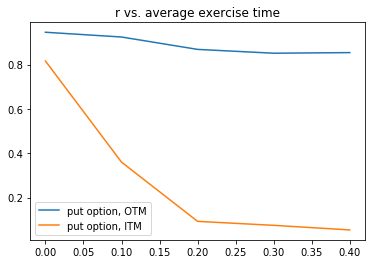

In [94]:
plt.plot(r_list,r_put_OTM_df["average exercise time"],label="put option, OTM")
plt.plot(r_list,r_put_ITM_df["average exercise time"],label="put option, ITM")
plt.legend()
plt.title("r vs. average exercise time")
plt.show()

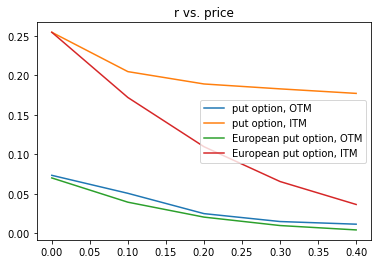

In [95]:
plt.plot(r_list,r_put_OTM_df["price"],label="put option, OTM")
plt.plot(r_list,r_put_ITM_df["price"],label="put option, ITM")
plt.plot(r_list,r_put_OTM_df["BS price"],label="European put option, OTM")
plt.plot(r_list,r_put_ITM_df["BS price"],label="European put option, ITM")

plt.legend()
plt.title("r vs. price")
plt.show()

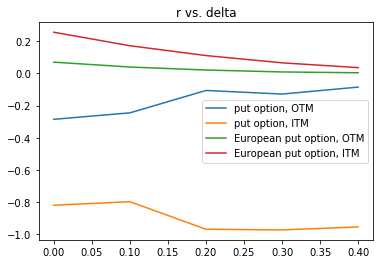

In [96]:
plt.plot(r_list,r_put_OTM_df["delta"],label="put option, OTM")
plt.plot(r_list,r_put_ITM_df["delta"],label="put option, ITM")
plt.plot(r_list,r_put_OTM_df["BS delta"],label="European put option, OTM")
plt.plot(r_list,r_put_ITM_df["BS delta"],label="European put option, ITM")
plt.legend()
plt.title("r vs. delta")
plt.show()

In [97]:
r_df1,r_df2 = averageExerciseTimeRiskFreeRate(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r_list=r_list,q=dividend,sigma=volatility,option_type="c")

price: 0.16549639179822845, delta-hedge: -0.6004957853402437
price: 0.03146826661884927, delta-hedge: -0.3235174029320515
price: 0.270610451533873, delta-hedge: -1.1519958153121161
price: 0.08051023635768553, delta-hedge: -0.4453606826326743
price: 0.3468164480115119, delta-hedge: -1.1418417080003858
price: 0.16586474492507447, delta-hedge: -0.9207261925386652
price: 0.4385731231050367, delta-hedge: -1.3690636958003932
price: 0.23741869826842646, delta-hedge: -0.4459964462449415
price: 0.5271879533910762, delta-hedge: -1.222139944434461
price: 0.3309009406739315, delta-hedge: -0.8195401248074271


In [99]:
r_call_ITM_df = r_df1
r_call_OTM_df = r_df2

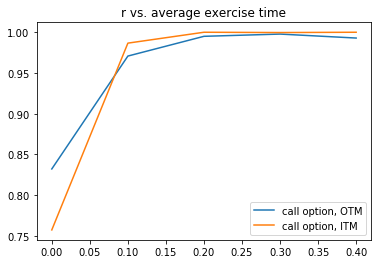

In [104]:
plt.plot(r_list,r_call_OTM_df["average exercise time"],label="call option, OTM")
plt.plot(r_list,r_call_ITM_df["average exercise time"],label="call option, ITM")

plt.legend()
plt.title("r vs. average exercise time")
plt.show()

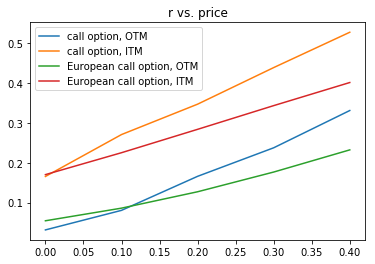

In [105]:
plt.plot(r_list,r_call_OTM_df["price"],label="call option, OTM")
plt.plot(r_list,r_call_ITM_df["price"],label="call option, ITM")
plt.plot(r_list,r_call_OTM_df["BS price"],label="European call option, OTM")
plt.plot(r_list,r_call_ITM_df["BS price"],label="European call option, ITM")

plt.legend()
plt.title("r vs. price")
plt.show()

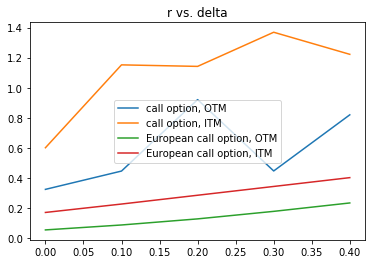

In [140]:
plt.plot(r_list,r_call_OTM_df["delta"],label="call option, OTM")
plt.plot(r_list,r_call_ITM_df["delta"],label="call option, ITM")
plt.plot(r_list,r_call_OTM_df["BS delta"],label="European call option, OTM")
plt.plot(r_list,r_call_ITM_df["BS delta"],label="European call option, ITM")

plt.legend()
plt.title("r vs. delta")
plt.show()

### 6.2 dividend

In [107]:
q_low=0
q_high=0.3
q_list = [0.1*i for i in range(3)]

In [108]:
q_df1,q_df2 = averageExerciseTimeDividend(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r=risk_free_rate,q_list=q_list,sigma=volatility,option_type="p")

price: 0.06369406627041597, delta-hedge: 0.3979475103779342
price: 0.23384361558768862, delta-hedge: 0.8038041002619591
price: 0.07278907815432188, delta-hedge: 0.3804692543538679
price: 0.2825511765834884, delta-hedge: 0.5916889430542438
price: 0.12117480061242318, delta-hedge: 0.36361468136140496
price: 0.36870448059543726, delta-hedge: 0.8385521966915168


In [109]:
q_put_OTM_df = q_df1
q_put_ITM_df = q_df2

In [110]:
q_put_OTM_df

,dividend,price,BS price,delta,average exercise time,BS delta
0,0.0,0.063694,0.050097,-0.397948,0.950875,0.049991
1,0.1,0.072789,0.078301,-0.380469,0.954250,0.079694
2,0.2,0.121175,0.114427,-0.363615,0.990250,0.113926


In [111]:
q_put_ITM_df

,dividend,price,BS price,delta,average exercise time,BS delta
0,0.0,0.233844,0.202370,-0.803804,0.662250,0.203310
1,0.1,0.282551,0.265429,-0.591689,0.913625,0.264599
2,0.2,0.368704,0.332059,-0.838552,0.939000,0.331158


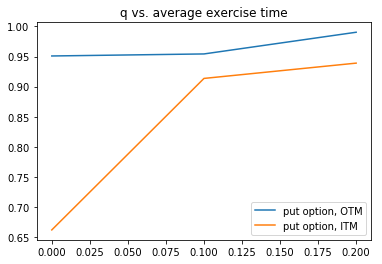

In [112]:
plt.plot(q_list,q_put_OTM_df["average exercise time"],label="put option, OTM")
plt.plot(q_list,q_put_ITM_df["average exercise time"],label="put option, ITM")
plt.legend()
plt.title("q vs. average exercise time")
plt.show()

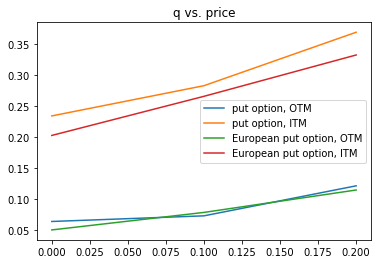

In [113]:
plt.plot(q_list,q_put_OTM_df["price"],label="put option, OTM")
plt.plot(q_list,q_put_ITM_df["price"],label="put option, ITM")
plt.plot(q_list,q_put_OTM_df["BS price"],label="European put option, OTM")
plt.plot(q_list,q_put_ITM_df["BS price"],label="European put option, ITM")
plt.legend()
plt.title("q vs. price")
plt.show()

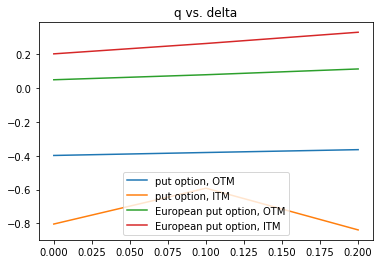

In [114]:
plt.plot(q_list,q_put_OTM_df["delta"],label="put option, OTM")
plt.plot(q_list,q_put_ITM_df["delta"],label="put option, ITM")
plt.plot(q_list,q_put_OTM_df["BS delta"],label="European put option, OTM")
plt.plot(q_list,q_put_ITM_df["BS delta"],label="European put option, ITM")
plt.legend()
plt.title("q vs. delta")
plt.show()

In [77]:
q_df1,q_df2 = averageExerciseTimeDividend(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r=risk_free_rate,q_list=q_list,sigma=volatility,option_type="c")

price: 0.20992494280967952, delta-hedge: -0.5291048150527156
price: 0.07833748403676652, delta-hedge: -0.5117878830988531
price: 0.14328186003546795, delta-hedge: -0.8411543566665243
price: 0.04513553628381123, delta-hedge: -0.32505839980808715
price: 0.11701486198534565, delta-hedge: -0.6914820060517288
price: 0.023962024608411098, delta-hedge: -0.21388854758531903


In [78]:
q_call_ITM_df = q_df1
q_call_OTM_df = q_df2

In [79]:
q_call_ITM_df

,dividend,price,BS price,delta,average exercise time,BS delta
0,0.0,0.209925,0.202509,0.529105,0.876250,0.201440
1,0.1,0.143282,0.135550,0.841154,0.864250,0.135886
2,0.2,0.117015,0.085570,0.691482,0.541125,0.086834


In [80]:
q_call_OTM_df

,dividend,price,BS price,delta,average exercise time,BS delta
0,0.0,0.078337,0.072253,0.511788,0.98250,0.071853
1,0.1,0.045136,0.040149,0.325058,0.97600,0.040766
2,0.2,0.023962,0.020673,0.213889,0.94825,0.020734


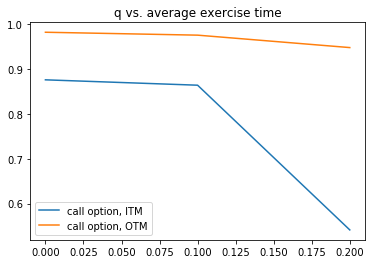

In [81]:
plt.plot(q_list,q_call_ITM_df["average exercise time"],label="call option, ITM")
plt.plot(q_list,q_call_OTM_df["average exercise time"],label="call option, OTM")
plt.legend()
plt.title("q vs. average exercise time")
plt.show()

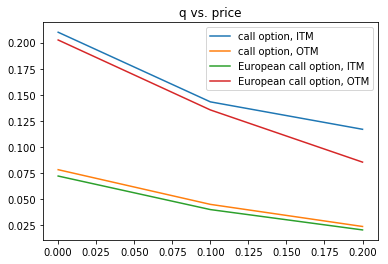

In [85]:
plt.plot(q_list,q_call_ITM_df["price"],label="call option, ITM")
plt.plot(q_list,q_call_OTM_df["price"],label="call option, OTM")
plt.plot(q_list,q_call_OTM_df["BS price"],label="European call option, ITM")
plt.plot(q_list,q_call_ITM_df["BS price"],label="European call option, OTM")
plt.legend()
plt.title("q vs. price")
plt.show()

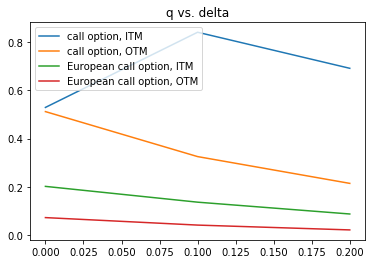

In [86]:
plt.plot(q_list,q_call_ITM_df["delta"],label="call option, ITM")
plt.plot(q_list,q_call_OTM_df["delta"],label="call option, OTM")
plt.plot(q_list,q_call_ITM_df["BS delta"],label="European call option, ITM")
plt.plot(q_list,q_call_OTM_df["BS delta"],label="European call option, OTM")
plt.legend()
plt.title("q vs. delta")
plt.show()

### 6.3 volatility

In [116]:
sigma_low = 0.3
sigma_high = 0.6
sigma_list = [0.3, 0.4, 0.5, 0.6]

In [141]:
sigma_df1,sigma_df2 = averageExerciseTimeVolatility(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r=risk_free_rate,q=dividend,sigma_list=sigma_list,option_type="p")

price: 0.05744485878780141, delta-hedge: 0.278073757833854
price: 0.22042752123264014, delta-hedge: 0.7675779308893705
price: 0.10191951843712066, delta-hedge: 0.4400875854718613
price: 0.2452901883686492, delta-hedge: 0.642588034338732
price: 0.10916136399515046, delta-hedge: 0.27002551251377127
price: 0.30912445467322314, delta-hedge: 0.5117862781937207
price: 0.16053806012604524, delta-hedge: 0.29891383083442263
price: 0.32523690546655193, delta-hedge: 0.42211719182261265


In [142]:
sigma_put_OTM_df = sigma_df1
sigma_put_ITM_df = sigma_df2

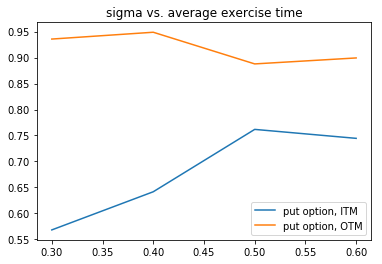

In [143]:
plt.plot(sigma_list,sigma_put_ITM_df["average exercise time"],label="put option, ITM")
plt.plot(sigma_list,sigma_put_OTM_df["average exercise time"],label="put option, OTM")
plt.legend()
plt.title("sigma vs. average exercise time")
plt.show()

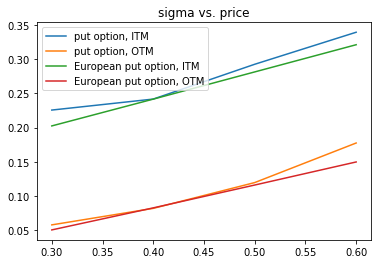

In [127]:
plt.plot(sigma_list,sigma_put_ITM_df["price"],label="put option, ITM")
plt.plot(sigma_list,sigma_put_OTM_df["price"],label="put option, OTM")
plt.plot(sigma_list,sigma_put_ITM_df["BS price"],label="European put option, ITM")
plt.plot(sigma_list,sigma_put_OTM_df["BS price"],label="European put option, OTM")

plt.legend()
plt.title("sigma vs. price")
plt.show()

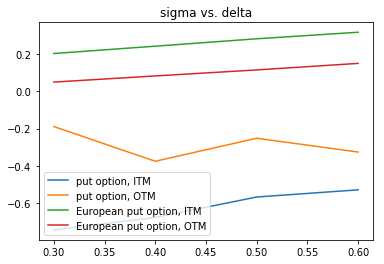

In [128]:
plt.plot(sigma_list,sigma_put_ITM_df["delta"],label="put option, ITM")
plt.plot(sigma_list,sigma_put_OTM_df["delta"],label="put option, OTM")
plt.plot(sigma_list,sigma_put_ITM_df["BS delta"],label="European put option, ITM")
plt.plot(sigma_list,sigma_put_OTM_df["BS delta"],label="European put option, OTM")

plt.legend()
plt.title("sigma vs. delta")
plt.show()

In [132]:
sigma_df1,sigma_df2 = averageExerciseTimeVolatility(S0=stock_price,K1=K1,K2=K2,T=time_to_maturity,r=risk_free_rate,q=dividend,sigma_list=sigma_list,option_type="c")

price: 0.20688963624406514, delta-hedge: -0.6166552181599961
price: 0.07740253314872338, delta-hedge: -0.4329936547852073
price: 0.25337734978682314, delta-hedge: -0.9248152664575845
price: 0.12665229141843717, delta-hedge: -0.34575457681613114
price: 0.2678658244179845, delta-hedge: -0.7311824586438068
price: 0.18493295263470091, delta-hedge: -0.815996875222987
price: 0.18013985936035184, delta-hedge: -1.0739456483533256
price: 0.19798550930741426, delta-hedge: -0.7692272493477635


In [133]:
sigma_call_ITM_df = sigma_df1
sigma_call_OTM_df = sigma_df2

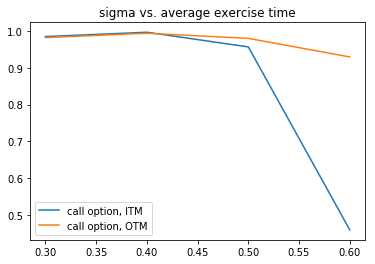

In [135]:
plt.plot(sigma_list,sigma_call_ITM_df["average exercise time"],label="call option, ITM")
plt.plot(sigma_list,sigma_call_OTM_df["average exercise time"],label="call option, OTM")
plt.legend()
plt.title("sigma vs. average exercise time")
plt.show()

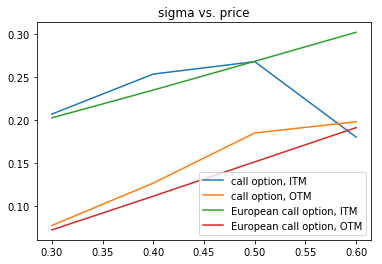

In [137]:
plt.plot(sigma_list,sigma_call_ITM_df["price"],label="call option, ITM")
plt.plot(sigma_list,sigma_call_OTM_df["price"],label="call option, OTM")
plt.plot(sigma_list,sigma_call_ITM_df["BS price"],label="European call option, ITM")
plt.plot(sigma_list,sigma_call_OTM_df["BS price"],label="European call option, OTM")

plt.legend()
plt.title("sigma vs. price")
plt.show()

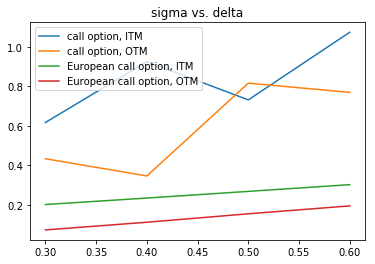

In [139]:
plt.plot(sigma_list,sigma_call_ITM_df["delta"],label="call option, ITM")
plt.plot(sigma_list,sigma_call_OTM_df["delta"],label="call option, OTM")
plt.plot(sigma_list,sigma_call_ITM_df["BS delta"],label="European call option, ITM")
plt.plot(sigma_list,sigma_call_OTM_df["BS delta"],label="European call option, OTM")

plt.legend()
plt.title("sigma vs. delta")
plt.show()